In [44]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"

In [60]:
sf_bbvi_small = pd.read_csv("test.csv", index_col=None)
elbo = sf_bbvi_small["elbo"].to_numpy()[380:]
times = sf_bbvi_small["time_steps"].to_numpy()[380:]
times -= np.min(times)

In [76]:
cavi_small = pd.read_csv("cavi_small_dataset.csv")
elbo_cavi_small = cavi_small["elbo"] - 18000
times_cavi_small = cavi_small["time"]

(-48000.0, 3643.3026161410253)

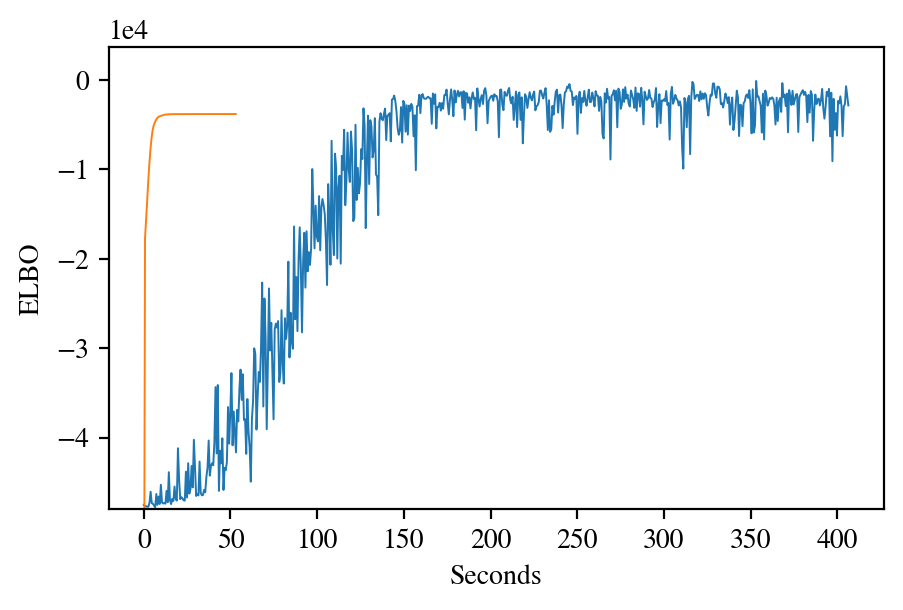

In [82]:
fig, axes = plt.subplots(figsize=(5, 3), dpi=200)
axes.plot(times, elbo, lw=0.7)
axes.plot(times_cavi_small, elbo_cavi_small, lw=0.7)
axes.set_xlabel("Seconds")
axes.set_ylabel("ELBO")
axes.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axes.set_ylim(-48000)

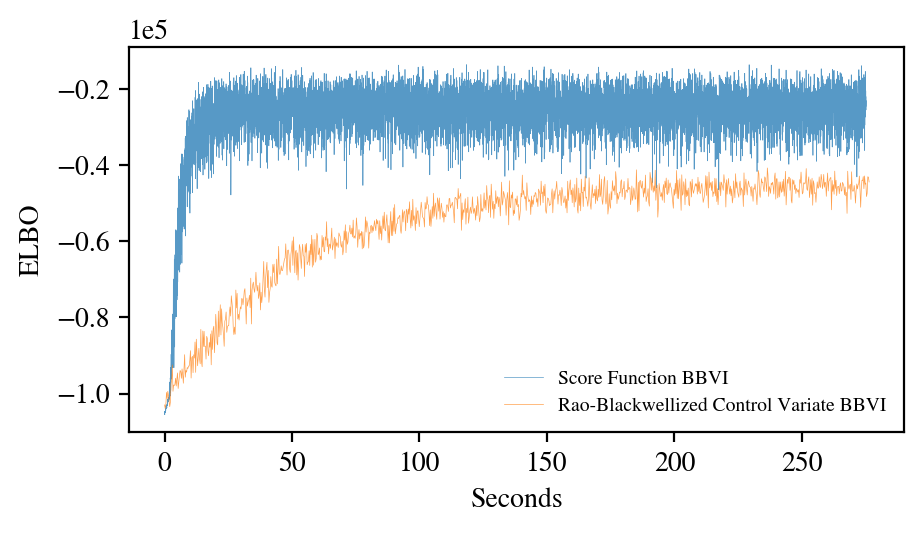

In [125]:
rbcv_bbvi_df = pd.read_csv("rbcv_bbvi_dataset.csv")
rbcv_bbvi_elbo = rbcv_bbvi_df["elbo"].to_numpy()[0:1088]
rbcv_bbvi_times = rbcv_bbvi_df["time_steps"].to_numpy()[0:1088]

bbvi_df = pd.read_csv("vanilla_bbvi_dataset.csv")
bbvi_elbo = bbvi_df["elbo"].to_numpy()[100:10000]
bbvi_times = bbvi_df["time_steps"].to_numpy()[100:10000]
bbvi_times = bbvi_times - np.min(bbvi_times)

fig, axes = plt.subplots(figsize=(5, 2.5), dpi=200)
axes.plot(bbvi_times, bbvi_elbo, lw=0.25, alpha=0.75, label="Score Function BBVI")
axes.plot(rbcv_bbvi_times, rbcv_bbvi_elbo, lw=0.25, alpha=0.75, label="Rao-Blackwellized Control Variate BBVI")
axes.set_xlabel("Seconds")
axes.set_ylabel("ELBO")
axes.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axes.legend(loc="lower right", fontsize=7, framealpha=0);